A1)
    Let us consider the entire algorithm to be one single event $C_3$. The given algorithm only gives output 0 and 1 hence it is going to be a Bernoulli Distribution.
    $C_3$ consists of two sub-events $C_1 \sim Bern(\frac{c_y}{c_y+c_x})$ and $C_2 \sim Bern(p_y)$ when $C_1$ returns 1 or $C_2 \sim Bern(p_x)$ when $C_1$ returns 0.

We can take cases where the generator will give output = 1. 
The generator will give output 1 when:<br>Case 1) $C_1 = 1$ and $C_2 = 1$, <br> Case 2) $C_1 = 1$ and $C_2 = 0$ or $C_1 = 0$ and $C_2 = 0$ and then Case 1(basically Case 2 is where the factory resets to step one), <br>Case 3) $C_1 = 1$ and $C_2 = 0$ or $C_1 = 0$ and $C_2 = 0$ and then Case 2 and so on...

Let $a_0 = \frac{p_y.c_y}{c_y+c_x}$
<br>$P(X = 1) = a_0 + a_0 . \big(\frac{c_y.(1-p_y)}{c_y + c_x} + \frac{c_x.(1-p_x)}{c_x+c_y}\big) + a_0 . \big(\frac{c_y.(1-p_y)}{c_y + c_x} + \frac{c_x.(1-p_x)}{c_x+c_y}\big)^{2} + ... \infty$

We can now use the formula for infinite GP.<br>
$S_\infty=\frac{a}{1-r}$
<br>
$P(X = 1) = \frac{\frac{c_y.p_y}{c_y+c_x}}{1 - \frac{c_y - c_y.p_y + c_x - c_x.p_x}{c_y+c_x}}$
<br>
On solving we get,<br>
$P(X = 1) = \frac{c_y.p_y}{c_y.p_y+c_x.p_x}$
<br>
Similarly,<br>
$P(X = 0) = \frac{c_x.p_x}{c_y.p_y+c_x.p_x}$
<br><br>
Hence we can conclude,
<br>
$C_3 \sim Bern(\frac{c_y.p_y}{c_y.p_y+c_x.p_x}) $

$P($Giving output 1 in one iteration $) = \frac{c_y.p_y}{c_x+c_y}$
<br>
$P($Giving output 0 in one iteration $) = \frac{c_x.p_x}{c_x+c_y}$

Now we need to find the number of iterations required for $C_3$ to give output 1 or 0.<br>
In other words we need to find the number of trials until first success. Clearly, it is a geometric distribution. So,
Number of Iterations $\sim Geom(\frac{c_y.p_y + c_x.p_x}{c_x+c_y})$.

A2)

In [7]:
using Distributions
using Statistics
using Plots
using StatsPlots

In [9]:
p = 2

2

In [11]:
function proposal()
    U = zeros(p)
    matrix = zeros(2,p)
    accept = 0
    count = 0
    while accept == 0
        sum_of_squares = 0
        count = count + 1
        for i in 1:p
            U[i] = rand(Uniform(-1,1))
            sum_of_squares = U[i]^2 + sum_of_squares
        end
        if sum_of_squares < 1
            accept = 1
            for j in 1:p
                matrix[1,j] = U[j]
            end
            matrix[2,1] = count
        end
    end
    return matrix
end

proposal (generic function with 1 method)

In [13]:
n = 10000
samp = zeros(n,p)
counts = zeros(n)
for i in 1:n
    matrix = proposal()
    for j in 1:p
        samp[i,j] = matrix[1,j]
    end
    counts[i] = matrix[2,1]
end

For p = 2

In [15]:
Statistics.mean(counts)

1.2705

In [32]:
expected_value = 4/pi

1.2732395447351628

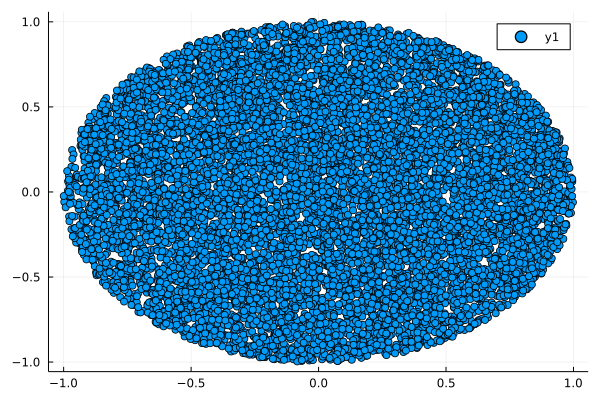

In [17]:
scatter(samp[:,1],samp[:,2])

For p = 3

In [36]:
p = 3
n = 10000
samp = zeros(n,p)
counts = zeros(n)
for i in 1:n
    matrix = proposal()
    for j in 1:p
        samp[i,j] = matrix[1,j]
    end
    counts[i] = matrix[2,1]
end

In [37]:
Statistics.mean(counts)

1.8954

In [35]:
expected_value = 6/pi

1.909859317102744

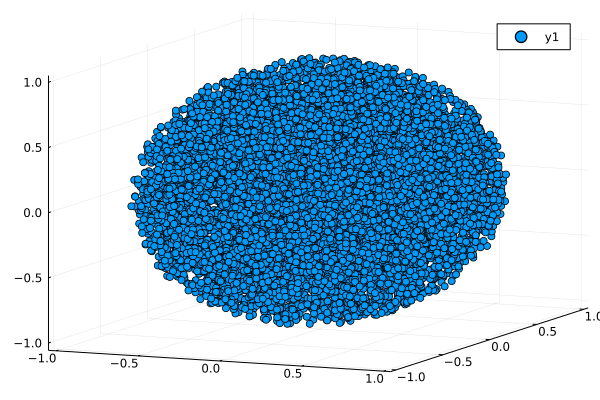

In [38]:
scatter(samp[:,1],samp[:,2],samp[:,3])

As p increases the accuracy of the mean decreases and hence we will need to increase the number of iterations

<br>A3)


In this question it is enough to evaluate if the random value generated lies between $-a$ and $a$.

In [19]:
function RandomNormal(a)
    flag = 0
    while flag == 0
        u = rand(Normal(0,1))
        if u<a && u>-a
            flag = 1
            return u
        end
    end
end

RandomNormal (generic function with 1 method)

In [21]:
n = 10000
Normal_values = zeros(n)
for i in 1:n
    Normal_values[i]=RandomNormal(4)
end


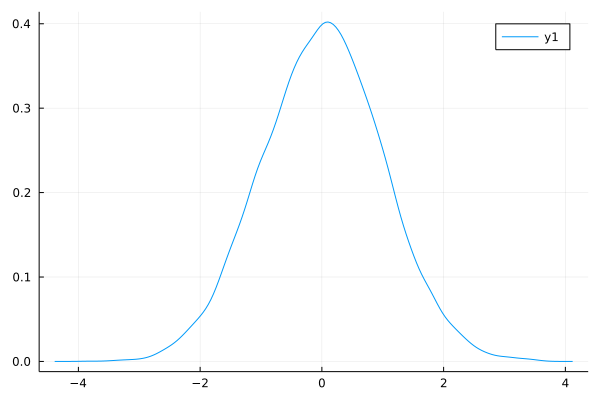

In [23]:
density(Normal_values)

In [25]:
std(Normal_values)

0.9978620601740409

In [27]:
mean(Normal_values)

0.016291244694867837

${E} (X\mid a<X<b)=\mu -\sigma {\frac {\phi (\beta )-\phi (\alpha )}{\Phi (\beta )-\Phi (\alpha )}}$

${E} (X\mid -4<X<4)= 0 - 1* {\frac {\phi (4 )-\phi (-4 )}{\Phi (4 )-\Phi (-4 )}}$
<br>
$\phi(4)=\phi(-4)$
<br>
<br>
${E} (X\mid -4<X<4)= 0$

${Var} (X\mid a<X<b)=\sigma ^{2}\left[1-{\frac {\beta \phi (\beta )-\alpha \phi (\alpha )}{\Phi (\beta )-\Phi (\alpha )}}-\left({\frac {\phi (\beta )-\phi (\alpha )}{\Phi (\beta )-\Phi (\alpha )}}\right)^{2}\right]\!$

${Var} (X\mid -4<X<4) \approx 0.9989$

$\sigma \approx 0.9994$

For a = 1

In [28]:
n = 10000
Normal_values = zeros(n)
for i in 1:n
    Normal_values[i]=RandomNormal(1)
end

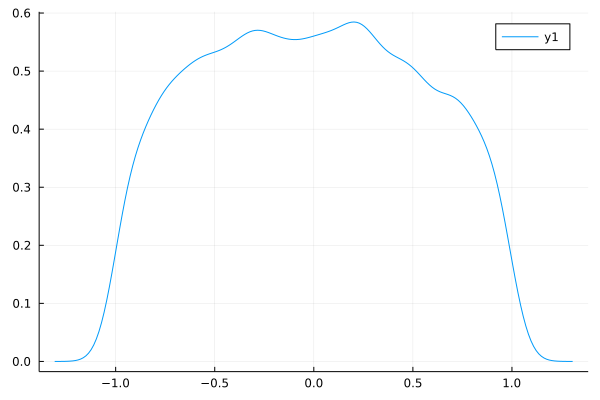

In [29]:
density(Normal_values)

In [30]:
std(Normal_values) 

0.5394663512678918

In [31]:
mean(Normal_values)

-0.0120781183606615

${E} (X\mid -4<X<4)= 0 - 1* {\frac {\phi (1)-\phi (-1 )}{\Phi (1 )-\Phi (-1 )}}$
<br>
$\phi(1)=\phi(-1)$
<br>
<br>
${E} (X\mid -1<X<1)= 0$

${Var} (X\mid -1<X<1) \approx 0.291124$

$\sigma \approx 0.539559$